In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv("failure.csv")

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [5]:
df.shape

(124494, 12)

In [6]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

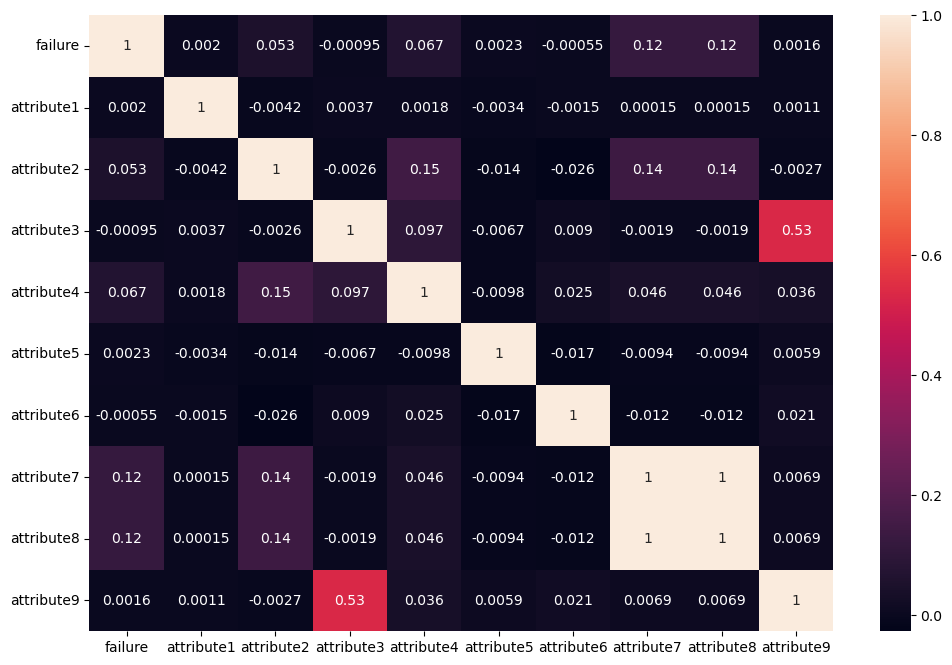

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True);

In [8]:
df["date"]=pd.to_datetime(df["date"])

df["year"]=2022-df["date"].dt.year
df["month"]=(df["date"]).dt.month
df["day"]=(df["date"]).dt.day

In [9]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.0,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524,7.0,4.028299,14.894196
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623,0.0,2.572167,8.759542
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,7.0,1.000000,1.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,7.0,2.000000,7.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,7.0,3.000000,15.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,7.0,6.000000,22.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000,7.0,11.000000,31.000000


In [10]:
abs(df.corr()["failure"].sort_values(ascending=False))

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
day           0.002994
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
month         0.000321
attribute6    0.000550
attribute3    0.000948
year               NaN
Name: failure, dtype: float64

In [11]:
#heatmap tablosunda da görüldüğü gibi attribute7 ve attribute8 birbirinin tekrarı olduğundan çıkartılabilir
(df["attribute7"]==df["attribute8"]).value_counts()

True    124494
dtype: int64

In [12]:
#Year tablosunda da tüm tarihler 2015 olduğundan dolayı sonucumuzu etkilemeyeceğinden çıkartalım
df.year.value_counts()

7    124494
Name: year, dtype: int64

In [13]:
df.drop(["attribute8","year"],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        124494 non-null  datetime64[ns]
 1   device      124494 non-null  object        
 2   failure     124494 non-null  int64         
 3   attribute1  124494 non-null  int64         
 4   attribute2  124494 non-null  int64         
 5   attribute3  124494 non-null  int64         
 6   attribute4  124494 non-null  int64         
 7   attribute5  124494 non-null  int64         
 8   attribute6  124494 non-null  int64         
 9   attribute7  124494 non-null  int64         
 10  attribute9  124494 non-null  int64         
 11  month       124494 non-null  int64         
 12  day         124494 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 12.3+ MB


In [15]:
del df["date"]

In [33]:
def clean_data(c):
    
    Q1=df[c].quantile(0.25)
    Q3=df[c].quantile(0.75)
    IQR=Q3-Q1
    alt_sinir=Q1-1.5*IQR
    ust_sinir=Q3+1.5*IQR
    df[c][df[c]>=ust_sinir]=ust_sinir
    df[c][df[c]<=alt_sinir]=alt_sinir

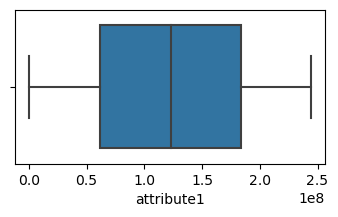

In [34]:
plt.figure(figsize=(4,2))
sns.boxplot(df['attribute1'])
clean_data('attribute1')

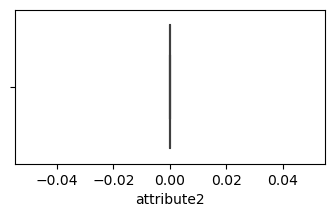

In [35]:
plt.figure(figsize=(4,2))
sns.boxplot(df['attribute2'])
clean_data('attribute2')

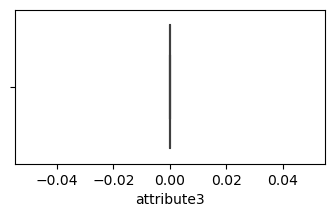

In [36]:
plt.figure(figsize=(4,2))
sns.boxplot(df['attribute3'])
clean_data('attribute3')

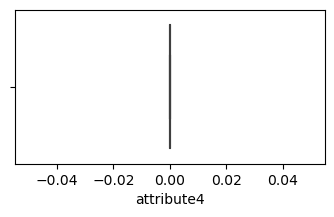

In [37]:
plt.figure(figsize=(4,2))
sns.boxplot(df['attribute4'])
clean_data('attribute4')

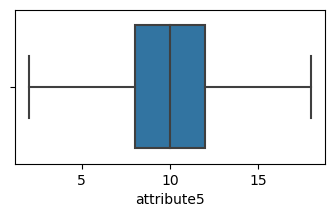

In [38]:
plt.figure(figsize=(4,2))
sns.boxplot(df['attribute5'])
clean_data('attribute5')

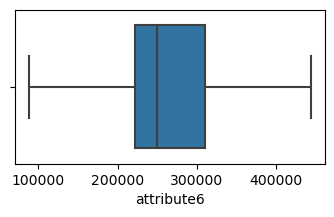

In [39]:
plt.figure(figsize=(4,2))
sns.boxplot(df['attribute6'])
clean_data('attribute6')

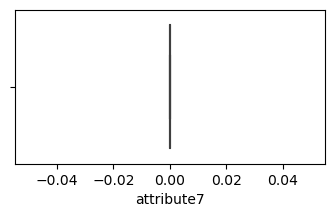

In [40]:
plt.figure(figsize=(4,2))
sns.boxplot(df['attribute7'])
clean_data('attribute7')

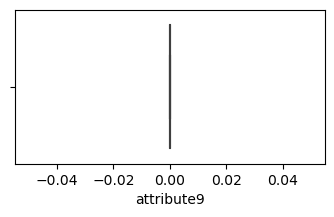

In [41]:
plt.figure(figsize=(4,2))
sns.boxplot(df['attribute9'])
clean_data('attribute9')

In [42]:
df=pd.get_dummies(df,drop_first=True)

In [43]:
x,y=df.drop("failure",axis=1),df["failure"]

In [44]:
x.shape,y.shape

((124494, 1177), (124494,))

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [116]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    from sklearn.ensemble import GradientBoostingClassifier
    
    import imblearn
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
              
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    G=GradientBoostingClassifier()
      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
    
    
    algos=[g,b,KN,SVC,D,R,Log,XGB,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    geometric_mean_scored=[]
       
    RUS=RandomUnderSampler(random_state=42)
    
    x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)
    
    for item in algos:

        predict=item.fit(x_RUS,y_RUS).predict(x_test)
                
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict))
        recall_scored.append(recall_score(y_test,predict))
        f1_scored.append(f1_score(y_test,predict))
        geometric_mean_scored.append(geometric_mean_score(y_test,predict))
              
    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score','gmc'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['gmc']=geometric_mean_scored
  
    return result.sort_values('accuracy_score',ascending=False)  


In [117]:
classification_funct(x,y)

,accuracy_score,f1_score,recall_score,precision_score,gmc
LogisticRegression,0.637354,0.001062,0.285714,0.000532,0.426813
RandomForestClassifier,0.596549,0.002225,0.666667,0.001114,0.630609
XGBClassifier,0.552917,0.001865,0.619048,0.000934,0.585025
DecisionTreeClassifier,0.519213,0.002267,0.809524,0.001135,0.648195
KNeighborsClassifier,0.458746,0.001778,0.714286,0.000890,0.572322
GaussianNB,0.458617,0.000830,0.333333,0.000416,0.391025
GradientBoostingClassifier,0.448271,0.001512,0.619048,0.000757,0.526716
SVC,0.444480,0.001040,0.428571,0.000521,0.436459
BernoulliNB,0.111361,0.001444,0.952381,0.000723,0.324834


In [ ]:
#veri sayısı classification yapmak için yeterli miktarda değil. O yüzden imblearn kütüphanesi kullanıldı. F1 skoru, sınıflandırıcınız için hassasiyet ve geri çağırma arasında bir denge sağlar. Hassasiyetiniz düşükse, F1 düşüktür ve geri çağırma yine düşükse, F1 puanınız düşük çıkmıştır..

### Deep learning ile şu şekilde;

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)

RUS=RandomUnderSampler(random_state=42)
x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)

In [58]:
model=Sequential()
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [59]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])
history = model.fit(x_RUS,y_RUS, batch_size=128, epochs=20, verbose=1, validation_data=(x_test,y_test))


Epoch 1/20
2/2 [==============================] - 8s 5s/step - loss: 835503.0625 - accuracy: 0.5145 - val_loss: 2931081.0000 - val_accuracy: 0.0012
Epoch 2/20
2/2 [==============================] - 3s 3s/step - loss: 1509665.5000 - accuracy: 0.4855 - val_loss: 364.6590 - val_accuracy: 0.9973
Epoch 3/20
2/2 [==============================] - 4s 4s/step - loss: 184376.9062 - accuracy: 0.5290 - val_loss: 2119617.2500 - val_accuracy: 0.0012
Epoch 4/20
2/2 [==============================] - 4s 4s/step - loss: 1027754.3125 - accuracy: 0.5000 - val_loss: 627.7720 - val_accuracy: 0.9972
Epoch 5/20
2/2 [==============================] - 4s 4s/step - loss: 265917.6250 - accuracy: 0.5000 - val_loss: 3654.6174 - val_accuracy: 0.0048
Epoch 6/20
2/2 [==============================] - 4s 4s/step - loss: 13785.2363 - accuracy: 0.4565 - val_loss: 558073.7500 - val_accuracy: 0.0012
Epoch 7/20
2/2 [==============================] - 4s 4s/step - loss: 282325.6250 - accuracy: 0.5000 - val_loss: 424155.3438

In [60]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

973/973 [==============================] - 8s 8ms/step - loss: 47.5957 - accuracy: 0.9963
Accuracy: 99.63


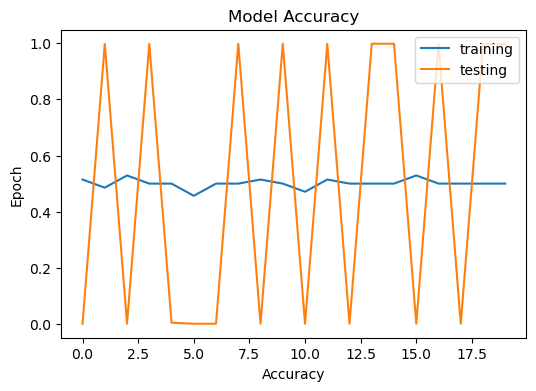

In [67]:
plt.figure(figsize=(6,4))
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper right");

<Figure size 600x400 with 0 Axes>

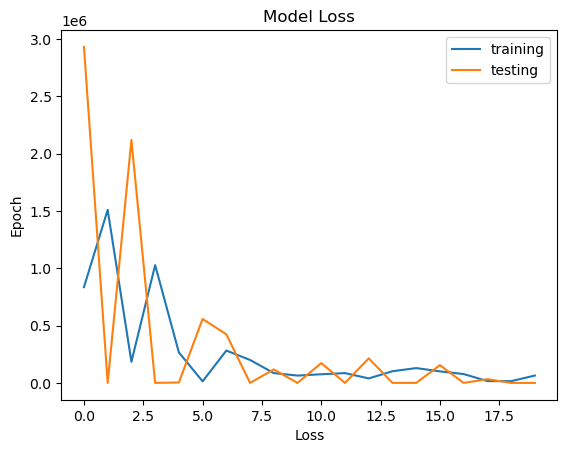

In [68]:
plt.figure(figsize=(6,4))
fig1=plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper right");